<a href="https://colab.research.google.com/github/ychervonyi/reinforcement-learning-learning/blob/main/action_value_bandits_chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
def sample_average_q_naive(actions_history, rewards_history, action):
  """
  Sample average method for estimating action value (2.1)
  """
  # Initial action values are zeros for all actions
  num = den = 0
  for a, r in zip(actions_history, rewards_history):
    if a == action:
      den += 1
      num += r
  # If denumerator is zero the value is zero
  q = 0 if den == 0 else num / den
  return q

In [45]:
from operator import itemgetter
def compute_action_values(history_actions, history_rewards, all_actions):
  """
  Naive computation - store everything in memory
  """
  # Number of time steps
  steps = len(history_actions)
  for t in range(steps):
    vals = []
    for a in all_actions:
      vals.append(sample_average_q_naive(history_actions[:t+1], history_rewards[:t+1], a))
    # Argmax - greedy action selection (2.2)
    index, element = max(enumerate(vals), key=itemgetter(1))
    print(f"Selected action: {history_actions[t]}")
    print(f"Next greedy action: {index + 1} (values: {vals})")

def compute_action_values_iter(history_actions, history_rewards, all_actions):
  """
  Iterative computation (2.3)
  """
  k = len(all_actions)quantum
  
  q_prev = [0] * k
  counters = [0] * k

  # Number of time steps
  steps = len(history_actions)
  for t in range(steps):
    # Initialize all action values with previous values
    q = [qq for qq in q_prev]
    a = history_actions[t]-1
    # Recompute q only for the current action
    # For other actions q_i = q_prev_i
    counters[a] += 1
    q[a] = q_prev[a] + 1/counters[a] * (history_rewards[t] - q_prev[a])
    # Argmax - greedy action selection (2.2)
    index, element = max(enumerate(q), key=itemgetter(1))
    print(f"Selected action: {history_actions[t]}")
    print(f"Next greedy action: {index + 1} (values: {q})")
    q_prev = q

In [47]:
# Exercise 2.2 from Sutton & Barto
# We are given a 4 arm bandit
k = 4
all_actions = list(range(1, k + 1))
# We are also given a history of actions and corresponding rewards
A = [1, 2, 2, 2, 3]
R = [-1, 1, -2, 2, 0]

compute_action_values(A, R, all_actions)
print("\nIterative method\n")
compute_action_values_iter(A, R, all_actions)

Selected action: 1
Next greedy action: 2 (values: [-1.0, 0, 0, 0])
Selected action: 2
Next greedy action: 2 (values: [-1.0, 1.0, 0, 0])
Selected action: 2
Next greedy action: 3 (values: [-1.0, -0.5, 0, 0])
Selected action: 2
Next greedy action: 2 (values: [-1.0, 0.3333333333333333, 0, 0])
Selected action: 3
Next greedy action: 2 (values: [-1.0, 0.3333333333333333, 0.0, 0])

Iterative method

Selected action: 1
Next greedy action: 2 (values: [-1.0, 0, 0, 0])
Selected action: 2
Next greedy action: 2 (values: [-1.0, 1.0, 0, 0])
Selected action: 2
Next greedy action: 3 (values: [-1.0, -0.5, 0, 0])
Selected action: 2
Next greedy action: 2 (values: [-1.0, 0.33333333333333326, 0, 0])
Selected action: 3
Next greedy action: 2 (values: [-1.0, 0.33333333333333326, 0.0, 0])


In [48]:
# Rat example from Deepmind 2018 lectures
# We are given a 2 arm bandit
k = 2
all_actions = list(range(1, k + 1))
# We are also given a history of actions and corresponding rewards
A = [1, 2, 2, 2, 2, 2]
R = [-1, 1, -1, -1, -1, -1]

compute_action_values(A, R, all_actions)
print("\nIterative method\n")
compute_action_values_iter(A, R, all_actions)

Selected action: 1
Next greedy action: 2 (values: [-1.0, 0])
Selected action: 2
Next greedy action: 2 (values: [-1.0, 1.0])
Selected action: 2
Next greedy action: 2 (values: [-1.0, 0.0])
Selected action: 2
Next greedy action: 2 (values: [-1.0, -0.3333333333333333])
Selected action: 2
Next greedy action: 2 (values: [-1.0, -0.5])
Selected action: 2
Next greedy action: 2 (values: [-1.0, -0.6])

Iterative method

Selected action: 1
Next greedy action: 2 (values: [-1.0, 0])
Selected action: 2
Next greedy action: 2 (values: [-1.0, 1.0])
Selected action: 2
Next greedy action: 2 (values: [-1.0, 0.0])
Selected action: 2
Next greedy action: 2 (values: [-1.0, -0.3333333333333333])
Selected action: 2
Next greedy action: 2 (values: [-1.0, -0.5])
Selected action: 2
Next greedy action: 2 (values: [-1.0, -0.6])


Let's reproduce figure 2.2 - "Average performance of $\epsilon$-greedy action-value methods on the 10-armed testbed"

In [13]:
import random
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(123123)

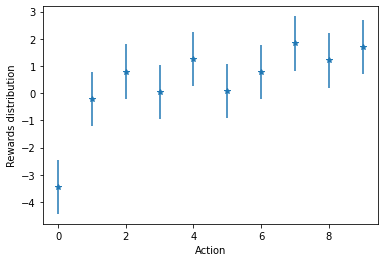

In [47]:
# k arms bandit
k = 10
# Action values `q_*(a)`, they are used as means for rewards
# mean 0 and variance 1
rewards_mean = np.random.normal(loc=0, scale=1, size=k)
# Let's plot rewards distribution (Figure 2.1)
plt.errorbar(list(range(k)), rewards_mean, [1] * k, linestyle='None', marker='*')
plt.xlabel("Action")
plt.ylabel("Rewards distribution")
plt.show()

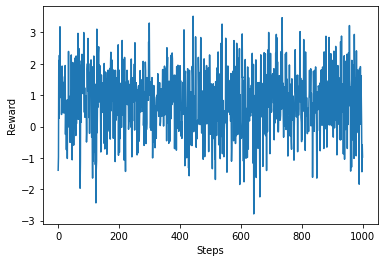

In [49]:
# Now let's do one run and plot average reward
q_prev = np.zeros(k)
counters = np.zeros(k)
rewards = []
steps = 1000
while steps > 0:
  q = np.copy(q_prev)
  a = np.argmax(q_prev)
  counters[a] += 1
  reward = np.random.normal(loc=rewards_mean[a], scale=1)
  q[a] = q_prev[a] + 1/counters[a] * (reward - q_prev[a])
  rewards.append(reward)
  q_prev = q
  steps -= 1
plt.plot(rewards)
plt.xlabel("Steps")
plt.ylabel("Reward")
plt.show()

In [18]:
import random
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(123123)
# Now let's do 2000 runs and plot average rewards
# Number of arms
k = 10

n_runs = 2000
steps = 1000
methods = {
    "greedy": {"color": "g"},
    "eps_greedy_001": {"eps": 0.01, "color": "r"},
    "eps_greedy_01": {"eps": 0.1, "color": "b"},
    "upper_conf_bound": {"c": 2, "color": "k"}
    }
all_rewards = {}
all_optimal_action_selected = {}

for method, params in methods.items():
  # We will average across runs, create variables to that we can compute average at the end
  rewards = np.zeros(steps)
  optimal_action_selected = np.zeros(steps)
  for run in range(n_runs):
    # Draw reward means from normal distribution with unit-variance
    rewards_mean = np.random.normal(loc=0, scale=1, size=k)
    # We know optimal action from the very beginning - action value with biggest mean
    optimal_action = np.argmax(rewards_mean)

    q_prev = np.zeros(k)
    counters = np.zeros(k)
    for step in range(steps):
      # Copy previous values and update only the value for the current action
      q = np.copy(q_prev)
      
      if method == "greedy":
        # Greddy. Eq (2.2)
        a = np.argmax(q_prev)
      elif method.startswith("eps_greedy"):
        # Epsilon-greedy - select action based on previous values or randomly
        if np.random.random() < params["eps"]:
          a = np.random.randint(1, k)
        else:
          a = np.argmax(q_prev)
      elif method == "upper_conf_bound":
        # Upper-confidence-bound action selection
        # Eq (2.10)
        a = 0
        max_val = -99999
        for i, val in enumerate(q_prev):
          if counters[i] == 0:
            a = i
            break
          new_val =  val + params["c"] * np.sqrt(np.log(step) / counters[i])
          if new_val > max_val:
            max_val = new_val
            a = i

      # Compute how often our algorithm chose the optimal action (we will average over runs, so add)
      optimal_action_selected[step] += optimal_action == a

      # Update counter for this action
      counters[a] += 1
      # Draw a reward from a normal distribution
      reward = np.random.normal(loc=rewards_mean[a], scale=1)
      # Compute action value 
      q[a] = q_prev[a] + 1/counters[a] * (reward - q_prev[a])
      # We will average rewards over runs, so add
      rewards[step]+= reward
      q_prev = q

  # Normalize by number of runs - expected value
  all_rewards[method] = rewards / n_runs
  all_optimal_action_selected[method] = optimal_action_selected / n_runs

In [19]:
def plot_all(data, ylabel):
  for method, y in data.items():
    params = methods[method]
    if method == "greedy":
      plt.plot(y, label=f"$\epsilon$=0", color=params["color"])
    elif method.startswith("eps_greedy"):
      plt.plot(y, label=f"$\epsilon$={params['eps']}", color=params["color"])
    elif method == "upper_conf_bound":
      plt.plot(y, label=f"Upper confidence bound method, c={params['c']}", color=params["color"])
  plt.xlabel("Step")
  plt.ylabel(ylabel)
  plt.legend()
  plt.title(f"Average performance of $\epsilon$-greedy action-value methods on the 10-armed testbed over {n_runs} runs")
  plt.show()

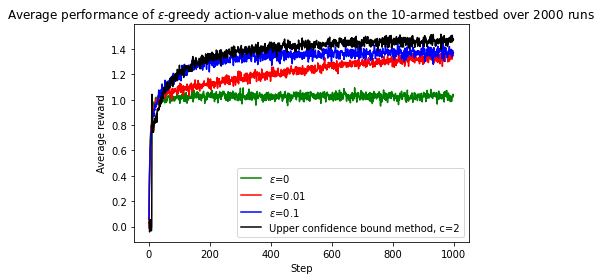

In [21]:
plot_all(all_rewards, "Average reward")

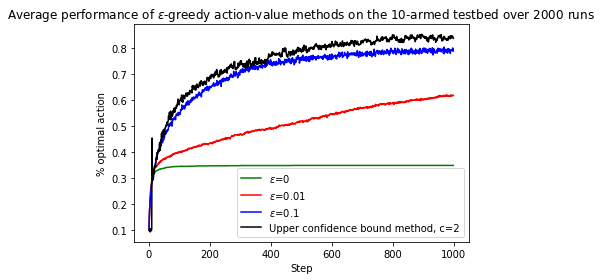

In [23]:
plot_all(all_optimal_action_selected, "% optimal action")

**Gradient ascent method**

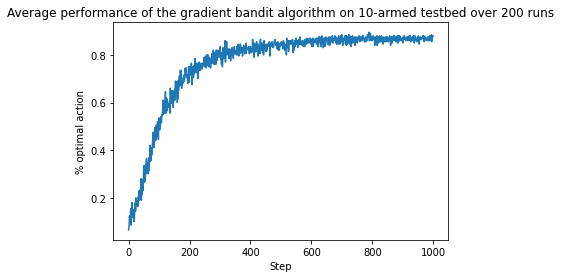

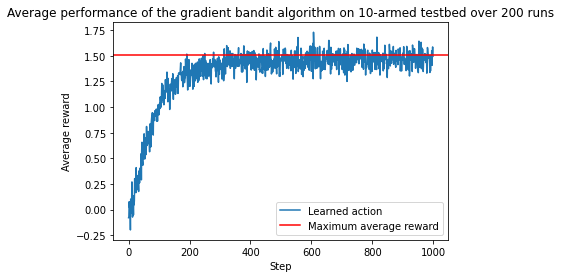

In [3]:
# In this cell we use average reward mean scalar and in the next one - average award for each arm

import random
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(123123)
# Now let's do 2000 runs and plot % optimal action
# Number of arms
k = 10

n_runs = 200
steps = 1000

# We will average across runs, create variables to that we can compute average at the end
rewards = np.zeros(steps)
optimal_action_selected = np.zeros(steps)

# The book says that selecing a positive mean reward (baseline) is important, but my experiments show it is not
baseline = 0
alpha = 0.1

# Average optimal reward - if we always pick the optimal action and average across all runs
total_optimal_reward = 0

def softmax(x):
    return np.exp(x - x.max()) / np.sum(np.exp(x - x.max()), axis=0)

for run in range(n_runs):
    # Draw reward means from normal distribution with unit-variance
    rewards_mean = np.random.normal(loc=baseline, scale=1, size=k)
    # We know optimal action from the very beginning - action value with biggest mean
    optimal_action = np.argmax(rewards_mean)
    
    # Keep track of the optimal reward - we will plot it later
    total_optimal_reward += rewards_mean.max()

    H = np.zeros(k)
    count = 0 
    aver_reward = baseline
    for step in range(steps):
      # Softmax action selection
    #   probs = np.exp(H) / np.sum(np.exp(H)) # this softmax might be unstable
      probs = softmax(H)

      # argmax with breaking ties
    #   a_selected = np.random.choice(np.flatnonzero(probs == probs.max())) - this does not work!!!
      a_selected = np.random.choice(k, p=probs)

      # Compute how often our algorithm chose the optimal action (we will average over runs, so add)
      optimal_action_selected[step] += optimal_action == a_selected

      # Draw a reward from a normal distribution
      reward = np.random.normal(loc=rewards_mean[a_selected], scale=1)

      # Compute preference
      delta = np.zeros(k)
      delta[a_selected] = 1
      H += alpha * (reward - aver_reward) * (delta - probs)

      # Update average reward
      aver_reward = (aver_reward * count + reward) / (count + 1)
      # Update count
      count += 1

      # Store award per step
      rewards[step]+= reward
  
optimal_action_selected /= n_runs
rewards /= n_runs
total_optimal_reward /= n_runs

plt.plot(optimal_action_selected)
plt.xlabel("Step")
plt.ylabel("% optimal action")
plt.title(f"Average performance of the gradient bandit algorithm on 10-armed testbed over {n_runs} runs")
plt.show()

plt.plot(rewards, label="Learned action")
plt.axhline(y=total_optimal_reward, color='r', linestyle='-', label="Maximum average reward")
plt.xlabel("Step")
plt.ylabel("Average reward")
plt.title(f"Average performance of the gradient bandit algorithm on 10-armed testbed over {n_runs} runs")
plt.legend()
plt.show()

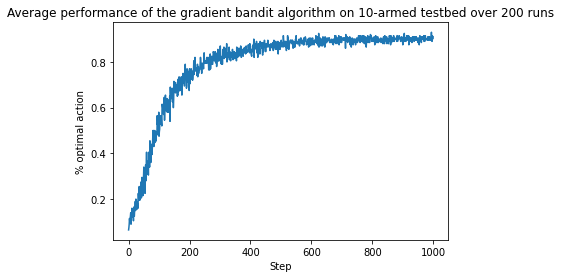

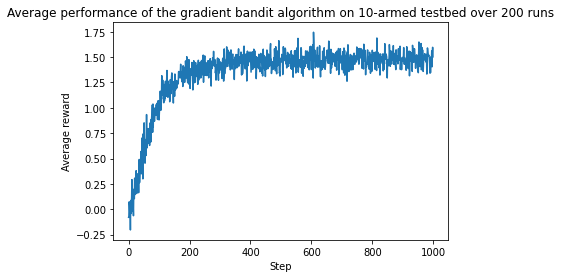

In [19]:
# Use average award for each arm!

import random
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(123123)
# Now let's do 2000 runs and plot % optimal action
# Number of arms
k = 10

n_runs = 200
steps = 1000

# We will average across runs, create variables to that we can compute average at the end
rewards = np.zeros(steps)
optimal_action_selected = np.zeros(steps)

def softmax(x):
    return np.exp(x - x.max()) / np.sum(np.exp(x - x.max()), axis=0)

baseline = 0
alpha = 0.1

for run in range(n_runs):
    # Draw reward means from normal distribution with unit-variance
    rewards_mean = np.random.normal(loc=baseline, scale=1, size=k)
    # We know optimal action from the very beginning - action value with biggest mean
    optimal_action = np.argmax(rewards_mean)

    H = np.zeros(k)
    counts = np.zeros(k) 
    aver_reward = np.zeros(k)
    for step in range(steps):
        # Softmax action selection
        probs = softmax(H)

        # argmax with breaking ties
        a_selected = np.random.choice(k, p=probs) 

        # Compute how often our algorithm chose the optimal action (we will average over runs, so add)
        optimal_action_selected[step] += optimal_action == a_selected

        # Draw a reward from a normal distribution
        reward = np.random.normal(loc=rewards_mean[a_selected], scale=1)

        # Compute preference
        for a in range(k):
            if a == a_selected:
                H[a] = H[a] + alpha * (reward - aver_reward[a]) * (1 - probs[a])
            else:
                H[a] = H[a] - alpha * (reward - aver_reward[a]) * probs[a]

        # Update count
        counts[a_selected] += 1

        # Update average reward
        aver_reward[a_selected] += 1/counts[a_selected] * (reward - aver_reward[a_selected])

        # Store award per step
        rewards[step]+= reward
  
optimal_action_selected /= n_runs
rewards /= n_runs

plt.plot(optimal_action_selected)
plt.xlabel("Step")
plt.ylabel("% optimal action")
plt.title(f"Average performance of the gradient bandit algorithm on 10-armed testbed over {n_runs} runs")
plt.show()

plt.plot(rewards)
plt.xlabel("Step")
plt.ylabel("Average reward")
plt.title(f"Average performance of the gradient bandit algorithm on 10-armed testbed over {n_runs} runs")
plt.show()